In [1]:
import sqlite3
import pandas as pd
import numpy as np
from datetime import datetime as dt

In [ ]:
# Задание 1

In [2]:
df = pd.read_csv('productstar_df.csv', index_col=0)

In [13]:
conn = sqlite3.connect('homework_8.db')
df.to_sql('prd', conn, if_exists='append', index=True)
conn.commit()

In [14]:
conn = sqlite3.connect('homework_8.db')
df1 = pd.read_sql_query('SELECT prd.user_id, sum(item_count) as sum_item_count FROM prd left join user_group on prd.user_id = user_group.user_id where order_state = "complete" and "group" = "B" group by prd.user_id', conn)

In [15]:
df1[['sum_item_count']].mean()

sum_item_count    14.225447
dtype: float64

In [16]:
df1[['sum_item_count']].median()

sum_item_count    10.0
dtype: float64

In [ ]:
#Задание 2

In [33]:
conn = sqlite3.connect('homework_8.db')
df_A = pd.read_sql_query('SELECT prd.user_id, sum(item_count) as sum_item_count FROM prd left join user_group on prd.user_id = user_group.user_id where order_state = "complete" and "group" = "A" group by prd.user_id', conn)
df_B = pd.read_sql_query('SELECT prd.user_id, sum(item_count) as sum_item_count FROM prd left join user_group on prd.user_id = user_group.user_id where order_state = "complete" and "group" = "B" group by prd.user_id', conn)
df_C = pd.read_sql_query('SELECT prd.user_id, sum(item_count) as sum_item_count FROM prd left join user_group on prd.user_id = user_group.user_id where order_state = "complete" and "group" = "C" group by prd.user_id', conn)

In [18]:
df_A[['sum_item_count']].mean()

sum_item_count    15.3408
dtype: float64

In [34]:
df_B[['sum_item_count']].mean()

sum_item_count    14.225447
dtype: float64

In [19]:
df_C[['sum_item_count']].mean()

sum_item_count    93.582649
dtype: float64

In [37]:
df_A['bin'] = [np.random.randint(600) for x in range(len(df_A))]
df_B['bin'] = [np.random.randint(600) for x in range(len(df_B))]
df_C['bin'] = [np.random.randint(600) for x in range(len(df_C))]

<AxesSubplot:>

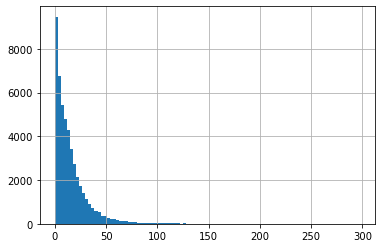

In [48]:
df_A.sum_item_count.hist(bins = 100)

<AxesSubplot:>

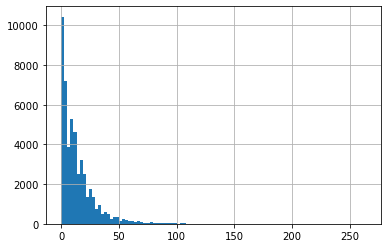

In [49]:
df_B.sum_item_count.hist(bins = 100)

<AxesSubplot:>

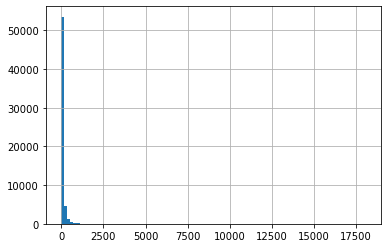

In [50]:
df_C.sum_item_count.hist(bins = 100) 